# Treinando Modelos (CAP. 4)

## Regressão Linear

## Método dos Mínimos Quadrados

In [2]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #retorna amostras da distribuição normal padrão (GAUSS)

### Função Linear + Ruído Gaussiano

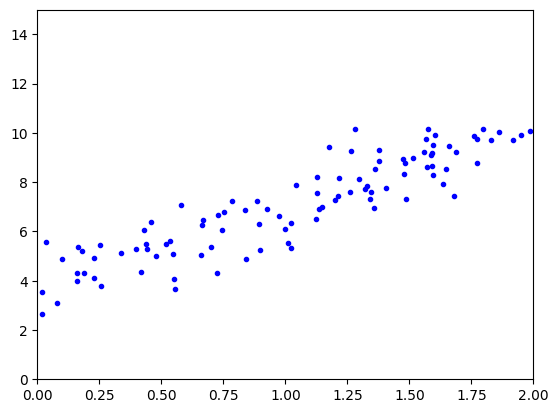

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Calculando Θ 

In [4]:
X_b = np.c_[np.ones((100,1)),X] # Adicionando x0 = 1 para toda instancia (termo de polarização)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [5]:
theta_best

array([[3.75142262],
       [3.22292781]])

### Fazendo previsões com Θ calculado:

In [6]:
X_new = np.array([[0],[2]])
y_pred = np.c_[np.ones((2,1)), X_new].dot(theta_best)
y_pred

array([[ 3.75142262],
       [10.19727823]])

### Plotando previsões do Modelo:

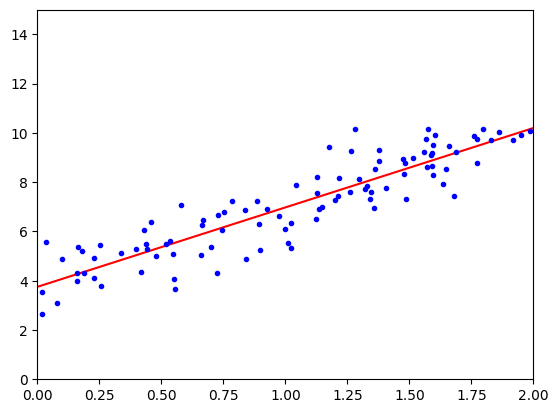

In [7]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Utilizando Scikit Learn:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.75142262]), array([[3.22292781]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.75142262],
       [10.19727823]])

## Gradiente Descendente

### Gradiente Descendente em Lote:

#### Passo do Gradiente Descendente:

In [10]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.75142262],
       [3.22292781]])

>Ao calcular as derivadas parciais da função de custo, obtemos o vetor de Gradientes  que aponta para o aumento mais acentuado da curva. Dessa forma basta ir em direção oposta aplicando a taxa de aprendizado para restringir o passo de cada iteração 

### Gradiente Descendente Estocástico:

#### Função de Cronograma de Aprendizado:

In [11]:
n_epochs = 50 # refere-se ao número de etapas

t0, t1 = 5, 10 # hiperparâmetros submetidos ao cronograma

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) #instancia aleatória no intervalo m
        xi = X_b[random_index:random_index+1] #seleciona a coluna 0 e 1 referente ao termo de polarização e theta 1
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [12]:
theta

array([[3.73235275],
       [3.22882138]])

#### Classe SGDRegressor do Scikit Learn para a Regressão Linear

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel()) #achatando a matriz y para se tornar um array unidimensional


SGDRegressor(n_iter_no_change=50, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.57649572]), array([3.37219478]))

## Regressão Polinomial

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3  
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # adicionando ruído a uma função quadrática

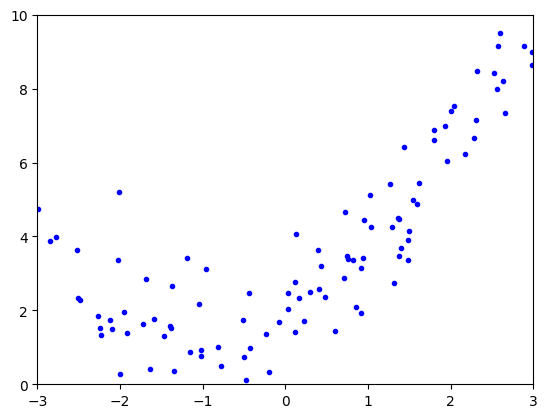

In [16]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

> É possível utilizar um modelo linear para acomodar dados não lineares adicionando o quadrado das características ao conjunto de treinamento como novas características. Em seguida basta utilizar um modelo linear nesse conjunto estendido.

### Adicionando o Quadrado das Características ao Conjunto de treinamento (extensão):

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Feature: ", X[0,0], "Squared Feature: ", X_poly[0, 1])

Feature:  -1.9492605938337424 Squared Feature:  3.799616862673074


### Ajustando a os Dados Estendidos a um Modelo Linear:

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept point: ", lin_reg.intercept_, "Coefficients: ","b = ", lin_reg.coef_[0,0], "a = ", lin_reg.coef_[0,1])

Intercept point:  [1.98914945] Coefficients:  b =  1.0572908060625046 a =  0.5511354429710033


In [19]:
X_new = np.array(np.arange(-3.0, 3.0 +0.1, .1))
X_new = np.reshape(X_new, (61, -1))


In [27]:
X_poly_new = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_poly_new)

### Plotando Polinomio do 2º Grau: 

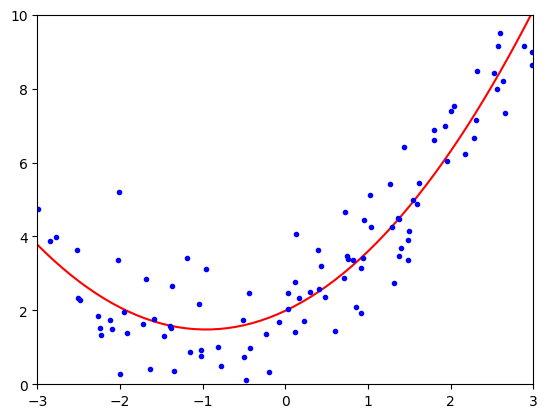

In [28]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

## Curvas de Aprendizado:

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves (model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "-+r", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "-b", linewidth=3, label ="Validation")
    plt.axis([0, 80, 0, 3 ])
    plt.xlabel("Tamanho do conjunto de treinamento")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right")
    

### Plotando Curva de Aprendizado utilizando um Modelo Linear:

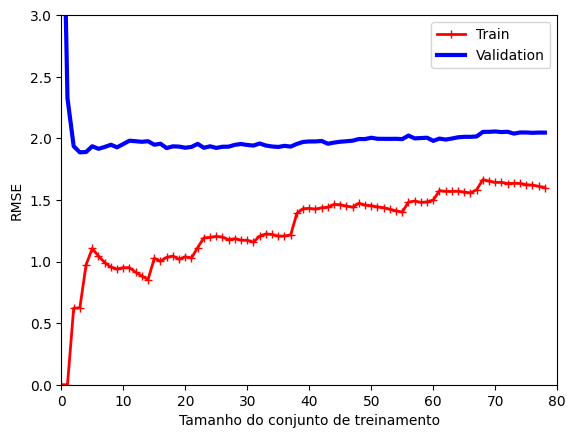

In [92]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- >*Curva de treinamento:* o modelo se ajusta quase que perfeitamente para poucas instâncias, e a medida que o tamanho do conjunto de treinamento aumenta, o modelo começa a se subajustar em decorrência do ruído e da não linearidade dos dados. A curva ascende até um platô (RMSE não melhora nem piora a medida que novas instâncias são adicionadas)
- >*Curva de validação:* Inicialmente, por haver poucas instâncias, o modelo generaliza muito mal. A medida que são apresentados novas amostras de treinamento, o modelo aprende e o erro na validação começa a diminuir. Entretanto uma linha reta não consegue modelar muito bem os dados, então novamente acaba em um platô próximo a outra curva   

### Modelo Polinomial (10º grau):

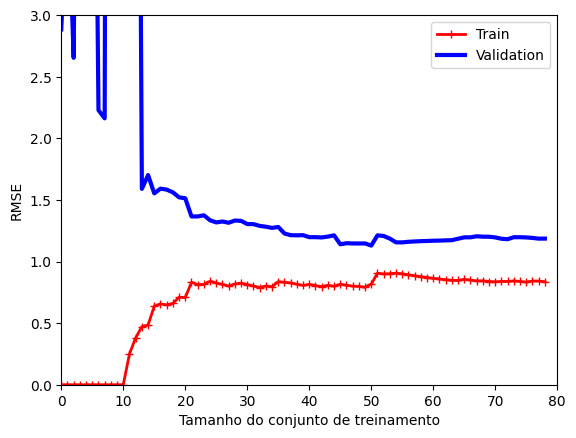

In [95]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
     ("lin_reg", LinearRegression()),
     ])
plot_learning_curves(polynomial_regression, X, y)